# TensorFlow 2.0 alpha - Custom Training - Basics

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Variables
#### Tensors - immutable, stateless Objects - but ML models need a changing state
#### Python - a Stateful programming language

In [2]:
x = tf.zeros([10,10])
x += 2

# this is equivalent to x = x + 2, which does not change the original value of x

print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


#### tf.Variable - Object storing value, can represent Weights - manipulate values with tf.assign_sub, tf.scatter_update, etc.

In [3]:
v = tf.Variable(1.0)
assert v.numpy() == 1.0

# re-assign the value

v.assign(3.0)
assert v.numpy() == 3.0

# use v in a TF operatin and reassign

v.assign(tf.square(v))
assert v.numpy() == 9.0

## Fit a Linear Model - using concepts of Tensor, GradientTape, Variable
#### 1. Define Model
#### 2. Define Loss Function
#### 3. Obtain Training Data
#### 4. Train Data, use Optimizer to Adjust Variables

In [4]:
# Define model - f(x) = x * W + b 
# W = 3.0, b = 2.0

class Model(object):
    def __init__(self):

# initialize variable to (5.0, 0.0) - in practice, initialize to random values
        
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
    
    def __call__(self, x):
        return self.W * x + self.b

model = Model()

assert model(3.0).numpy() == 15.0

### Define Loss Function
#### Measures how well an output, matches the desired output, given an inupt

In [5]:
# use standard L2 loss

def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

### Obtain Training Data
#### Synthesize training data, with Noise

In [7]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

#### Visualize the model before training

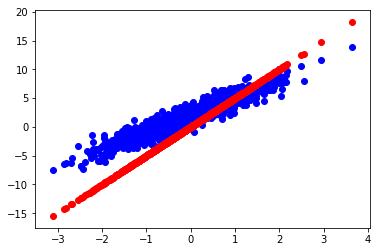

Current loss: 
9.880891


In [8]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: ')
print(loss(model(inputs), outputs).numpy())

### Define a Training Loop
#### Use the training to update the variables (W, b) - so the Loss decreases, using Gradient Descent
#### There are variants of Gradient Descent scheme - captured within tf.train.Optimizer implementations

In [9]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

#### Through Training, see how W and b evolve

Epoch  0: W=5.00 b=0.00, loss=9.88089
Epoch  1: W=4.56 b=0.43, loss=6.48238
Epoch  2: W=4.21 b=0.77, loss=4.38739
Epoch  3: W=3.94 b=1.04, loss=3.09589
Epoch  4: W=3.73 b=1.25, loss=2.29971
Epoch  5: W=3.57 b=1.42, loss=1.80885
Epoch  6: W=3.44 b=1.55, loss=1.50623
Epoch  7: W=3.34 b=1.65, loss=1.31964
Epoch  8: W=3.26 b=1.73, loss=1.20460
Epoch  9: W=3.20 b=1.80, loss=1.13366


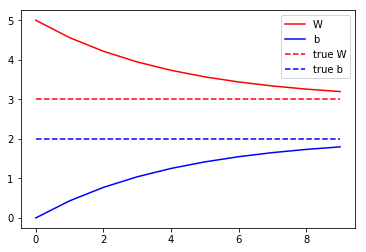

In [12]:
model = Model()

# collect history of Ws and bs - plot later

Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)
    
    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
         (epoch, Ws[-1], bs[-1], current_loss))

# plot all

plt.plot(epochs, Ws, 'r',
        epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
        [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true b'])
plt.show()